In [2]:
pwd

'D:\\gitclon\\python-lecture\\python-lecture\\Session13 - 객체인식모델 연동실습_yolo'

In [1]:
a=3
b=5
a+b

8

In [1]:
import pandas as pd
### 1. 데이터 불러오기
csData = pd.read_csv("../dataset/kopo_customerdata.csv")

### 2. TOTAL_AMOUNT 컬럼 내 최소,최대값을 모두 삭제한 평균을 구하시오
amountList = csData.TOTAL_AMOUNT.tolist()

### 3. 평균 산출 

##### 코드 개발

##### 코드 개발

amountListSum = sum(amountList)
amountListLen = len(amountList)
answer = amountListLen / amountListSum

In [6]:
scoreList = [1,2,3,4]
sum(scoreList)

TypeError: 'int' object is not callable

### 모델 불러오기

In [1]:
from ultralytics import YOLO
import cv2
import math 
# # start webcam
# capture = cv2.VideoCapture(0)

# capture.set(3, 640)
# capture.set(4, 480)

# model
model = YOLO("best_fire.pt")

In [2]:
# object classes
classNames = ["fire"
              ]

In [4]:
results = model("d:/yolodata/fireDetect/test/images/large_-1194-_jpg.rf.b37a3ee840083d0240de3fe3dd159abd.jpg")[0]


image 1/1 d:\yolodata\fireDetect\test\images\large_-1194-_jpg.rf.b37a3ee840083d0240de3fe3dd159abd.jpg: 640x640 (no detections), 152.6ms
Speed: 7.0ms preprocess, 152.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
import matplotlib.pyplot as plt

In [1]:
# from google.cloud import texttospeech

# # 구글 클라이언트 인스턴스 생성
# client = texttospeech.TextToSpeechClient()

# def text_to_speech(text, output_file):
#     synthesis_input = texttospeech.SynthesisInput(text=text)

#     # 음성 합성 매개변수 설정
#     voice = texttospeech.VoiceSelectionParams(
#         language_code="ko-KR", 
#         ssml_gender=texttospeech.SsmlVoiceGender.NEUTRAL
#     )

#     audio_config = texttospeech.AudioConfig(
#         audio_encoding=texttospeech.AudioEncoding.LINEAR16
#     )

#     # 텍스트를 음성으로 변환
#     response = client.synthesize_speech(
#         input=synthesis_input, voice=voice, audio_config=audio_config
#     )

#     # 결과를 파일로 저장
#     with open(output_file, "wb") as out:
#         out.write(response.audio_content)

# # 변환할 텍스트와 출력 파일명 설정
# text = "안녕하세요. 텍스트를 음성으로 변환하는 예제입니다."
# output_file = "output.wav"

# # 텍스트를 음성으로 변환하여 파일로 저장
# text_to_speech(text, output_file)

ModuleNotFoundError: No module named 'google.cloud'

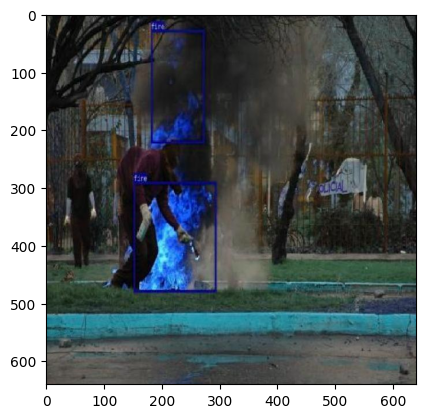

In [7]:
plt.imshow( results.plot() )

### 2. 웹캠 연동

In [1]:

while (capture.isOpened):
    ret, frame = capture.read()
    # results = model(img, stream=True)
    results = model(frame)[0]

    # coordinates
    for r in results:
        boxes = r.boxes
        # print("r진입",r)

        for box in boxes:
            # print("box진ㅇ비",box)
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(frame, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', frame)
    key = cv2.waitKey(33)#1) & 0xFF
    # esc 종료
    if key == 27:
        break


capture.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 25.9ms
Speed: 6.0ms preprocess, 25.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 24.9ms
Speed: 4.0ms preprocess, 24.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 26.9ms
Speed: 4.0ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 22.9ms
Speed: 3.0ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 22.9ms
Speed: 3.0ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 23.9ms
Speed: 3.0ms preprocess, 23.9ms i